# Logistic Regression from scratch

Given a set of inputs X, we want to assign them to one of two possible categories (0 or 1). Logistic regression models the probability that each input belongs to a particular category.
<img src='https://miro.medium.com/max/612/1*3e5CuJXlr4UkYXMaTXe4DA.png' alt='logestic regression' height='300px' width='500px'/>

## Hypothesis
A function which takes inputs (Weights W and X) and returns probability(0 or 1). There are many functions that meet this description, but in this case i am using <b><i>Logistic Function</i></b> or <b><i>Sigmoid Function</i></b>.

<table>
    <tr>
        <td>
            <img src='https://www.researchgate.net/profile/Tali-Leibovich-Raveh/publication/325868989/figure/fig2/AS:639475206074368@1529474178211/A-Basic-sigmoid-function-with-two-parameters-c1-and-c2-as-commonly-used-for-subitizing.png' alt='sigmoid graph'/>
        </td>
        <td>
            <img src='https://miro.medium.com/max/292/1*p4hYc2VwJqoLWwl_mV0Vjw.png' alt='sigmoid formula'/>
        </td>
    </tr>
</table>

In [1]:
import numpy as np

def sigmoid(z):
    return 1 / ( 1+np.exp(-z) )

## Loss Function
Functions have parameters/weights (represented by theta in our notion) and we want to find best value for them. To start with we pick random values and we need to measure how well the algorithm performs using those random weights. That measure is computed using the loss function, here we are using log loss for calculating loss.

<img src='https://miro.medium.com/max/700/1*FdxEs8Iv_43Q8calTCjnow.png' />

In [2]:
def log_loss(h, y):
    return (-y*np.log(h) - (1-y) * np.log(1-h)).mean()

## Gradient Descent
Our goal is to minimize the loss function and the way we can do is by increasing or descreasing weights, But how do we know what parameters should be bigger or smaller? The way we can achieve this is by calculating derevative of loss function with respect to each weight.

<img src='https://miro.medium.com/max/536/1*gobKgGbRWDAoVFAan_HjxQ.png' alt='Gradient descent' />

<code>gradient = np.dot(X.T, (h-y))/y.shape[0]</code>

Then we update the weights by subtracting to them the derevative times the learning rate. Learning rate is a hyperparameter which means we have to choose the value of learning rate, genrally learning rate is 0.1 and decrease it over iterations for better results.
<code>
lr = 0.1              
theta -= lr * gradient
</code>

## Predictions
By calling sigmoid function we will get probability of positive class ranging between 0-1 and probability of negative class will be 1 - Probability(positive_clas). We will create 2 function:
- predict_proba: function will return probability of positive or true class
- predict: function will return predicted class label

In [3]:
def predict_proba(X, theta):
    z = np.dot(X, theta)
    return sigmoid(z)

def predict(X, theta, threshold=.5):
    z = np.dot(X, theta)
    return sigmoid(z) >= threshold

## Putting all in together

In [16]:
class LogisticRegression():
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
        
        
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    
    def __sigmoid(self, z):
        return 1/(1+np.exp(-z))
    
    
    def __loss(self, h, y):
        return (-y * np.log(h) - (1-y) * np.log(1-h)).mean()
    
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        # weights initialization
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            
            gradient = np.dot(X.T, (h-y))/y.size
            self.theta -= self.lr * gradient
            
            if (self.verbose == True and i%10000==0):
                z = np.dot(X, self.theta)
                h = self.__sigmoid(z)
                print(f'loss: {self.__loss(h, y)} \t')
        
        
    def predict_proba(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
            
        return self.__sigmoid(np.dot(X, self.theta))
    
    
    def predict(self, X, threshold=0.5):
        return self.predict_proba(X) >= threshold

## Loading Model, splittng training and testing data

In [1]:
import sklearn.datasets as ds
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# loading data
iris = ds.load_iris()
X = iris.data[:, :2]
y = (iris.target != 0) * 1

# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Model Training

In [90]:
model = LogisticRegression(lr=0.1, num_iter=300000, verbose=True)
%time model.fit(X_train, y_train)

loss: 0.5950720206435113 	
loss: 0.041235466570876955 	
loss: 0.03466757002499189 	
loss: 0.03055047207369838 	
loss: 0.027371617845330088 	
loss: 0.024795622176189414 	
loss: 0.022671433690586495 	
loss: 0.02090008968265174 	
loss: 0.01940746106731971 	
loss: 0.018136349033027292 	
loss: 0.017042542478847712 	
loss: 0.016091900989575574 	
loss: 0.015258000585882841 	
loss: 0.014520273177734296 	
loss: 0.013862580255518148 	
loss: 0.013272141083861726 	
loss: 0.012738734774177297 	
loss: 0.012254107271248848 	
loss: 0.01181152922556944 	
loss: 0.011405464331931988 	
loss: 0.011031318587455716 	
loss: 0.010685249083755574 	
loss: 0.01036401688814185 	
loss: 0.010064872830848868 	
loss: 0.009785468058472732 	
loss: 0.009523783388055648 	
loss: 0.009278073055827103 	
loss: 0.00904681957989269 	
loss: 0.00882869727380669 	
loss: 0.008622542546616905 	
CPU times: user 5.91 s, sys: 11.2 ms, total: 5.92 s
Wall time: 5.9 s


## Accuracy of Model

In [97]:
from sklearn.metrics import accuracy_score
preds = model.predict(X_test)
print(f'Accuracy : {accuracy_score(preds,y_test).mean()}')

Accuracy : 1.0


## Decision boundary

<img src='https://miro.medium.com/max/598/1*8uuWQtF0IHHUp6Ds3znL5Q.png' alt='decision boundary'/>

## Model weights and Biases

In [92]:
# Out weights and biases
model.theta

array([-28.72625499,  12.9364861 , -13.09090682])

## Plotting decision boundary

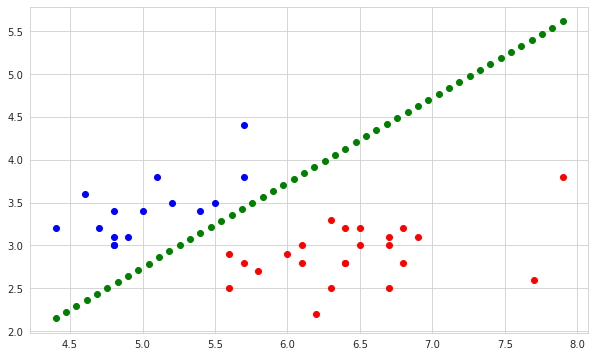

In [95]:
import matplotlib.pyplot as plt

# reference for plotting: https://stackoverflow.com/a/48022752/13028501
inputs = X_test
targets = y_test
weights = model.theta
plt.figure(figsize=(10,6))
plt.grid(True)

for input,target in zip(inputs,targets):
    plt.plot(input[0],input[1],'ro' if (target == 1.0) else 'bo')
# Here i am calculating slope and intercept with given three weights
for i in np.linspace(np.amin(inputs[:,:1]),np.amax(inputs[:,:1])):
    slope = -(weights[0]/weights[2])/(weights[0]/weights[1])  
    intercept = -weights[0]/weights[2]

    #y =mx+c, m is slope and c is intercept
    _y = (slope*i) + intercept
    plt.plot(i, _y,'g-o')

plt.show();

## Comparing with sklearn's LogisticRegression

In [102]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=42)
%time clf.fit(X_train, y_train)

CPU times: user 19.6 ms, sys: 93 µs, total: 19.7 ms
Wall time: 17.1 ms


LogisticRegression(random_state=42)

## Accuracy of Sklern's LogisticRegression

In [104]:
y_pred = clf.predict(X_test)
print(f'Sklearn LogisticRegression: {accuracy_score(y_pred, y_test)}')

Sklearn LogisticRegression: 1.0
